In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


2023-04-23 20:22:29.198965: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 20:22:29.370887: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-23 20:22:29.370912: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-23 20:22:30.247069: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Загружаем датасет X_bp.
ds_bp = pd.read_excel(io='X_bp.xlsx')
#print(ds_bp)
ds_bp.shape

(1023, 11)

In [3]:
# Загружаем датасет X_nup.
ds_nup = pd.read_excel(io='X_nup.xlsx')
#print(ds_nup)
ds_nup.shape

(1040, 4)

In [4]:
# Объединяем два датасета в один по столбцу 'Unnamed: 0', тип объединения inner. 
# Затем удаляем неинформативный столбец'Unnamed: 0'. 
# Проверяем размерность и видим, что лишние строки из второго датасета отброшены.
ds_full = ds_bp.merge(right=ds_nup, how='inner', on='Unnamed: 0')
ds_full.drop(columns=['Unnamed: 0'], inplace=True)
#print(ds_full)
ds_full.shape

(1023, 13)

In [5]:
# Проверяем тип данных признаков. Все данные числового типа - признаки количественные, качественные отсутствуют.
# Убеждаемся, что нет ячеек с пропущенными данными.
# Проверяем данные на уникальность. 
ds_full.info()
#ds_full.isnull().sum()
ds_full.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [6]:
# Запрашиваем описание датасета.
ds_describe = ds_full.describe().T
print(ds_describe)

                                       count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.

Количество выбросов в столбце "Соотношение матрица-наполнитель": 6
Количество выбросов в столбце "Плотность, кг/м3": 9
Количество выбросов в столбце "модуль упругости, ГПа": 2
Количество выбросов в столбце "Количество отвердителя, м.%": 14
Количество выбросов в столбце "Содержание эпоксидных групп,%_2": 2
Количество выбросов в столбце "Температура вспышки, С_2": 8
Количество выбросов в столбце "Поверхностная плотность, г/м2": 2
Количество выбросов в столбце "Модуль упругости при растяжении, ГПа": 6
Количество выбросов в столбце "Прочность при растяжении, МПа": 11
Количество выбросов в столбце "Потребление смолы, г/м2": 8
Количество выбросов в столбце "Угол нашивки, град": 0
Количество выбросов в столбце "Шаг нашивки": 4
Количество выбросов в столбце "Плотность нашивки": 21
Общее количество выбросов: 93


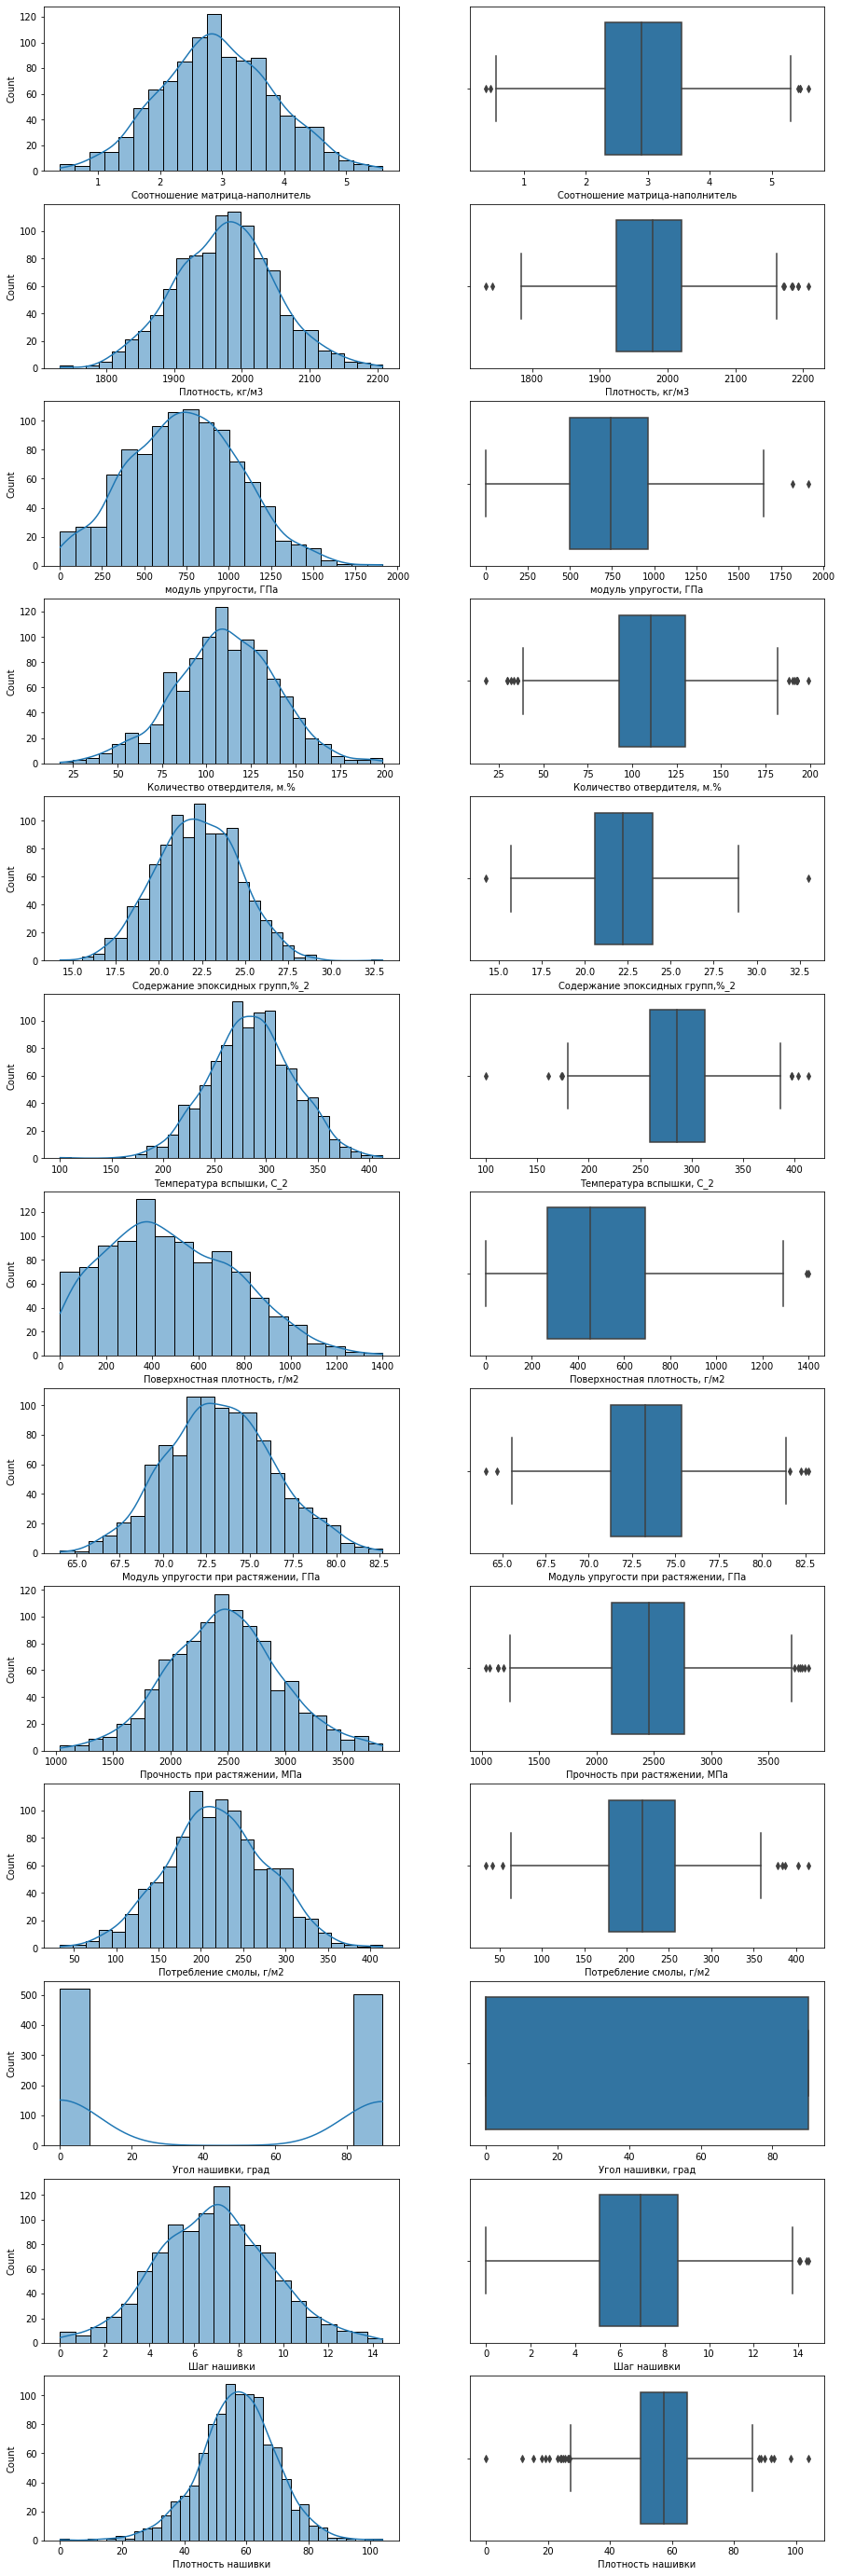

In [7]:
# Проверяем количество выбросов по столбцам.
# Строим гистограммы распределения. Данные стремятся к нормальному распределению, кроме "угла нашивки".
# "Угол нашивки" может принимать лишь два значения.
# Строим "ящики с усами", на них обнаружены выбросы во всех стобцах, кроме "угла нашивки".
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(15, 50))
count = 0
for k, column in enumerate(ds_full.columns):    
    sns.histplot(data=ds_full, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=ds_full, x=column, ax=axes[k, 1])
    outlier = boxplot_stats(X=ds_full[column])
    #print(outlier)
    print (f'Количество выбросов в столбце "{column}": {len(outlier[0]["fliers"])}')
    count+=len(outlier[0]["fliers"])
print(f'Общее количество выбросов: {count}')
plt.show()

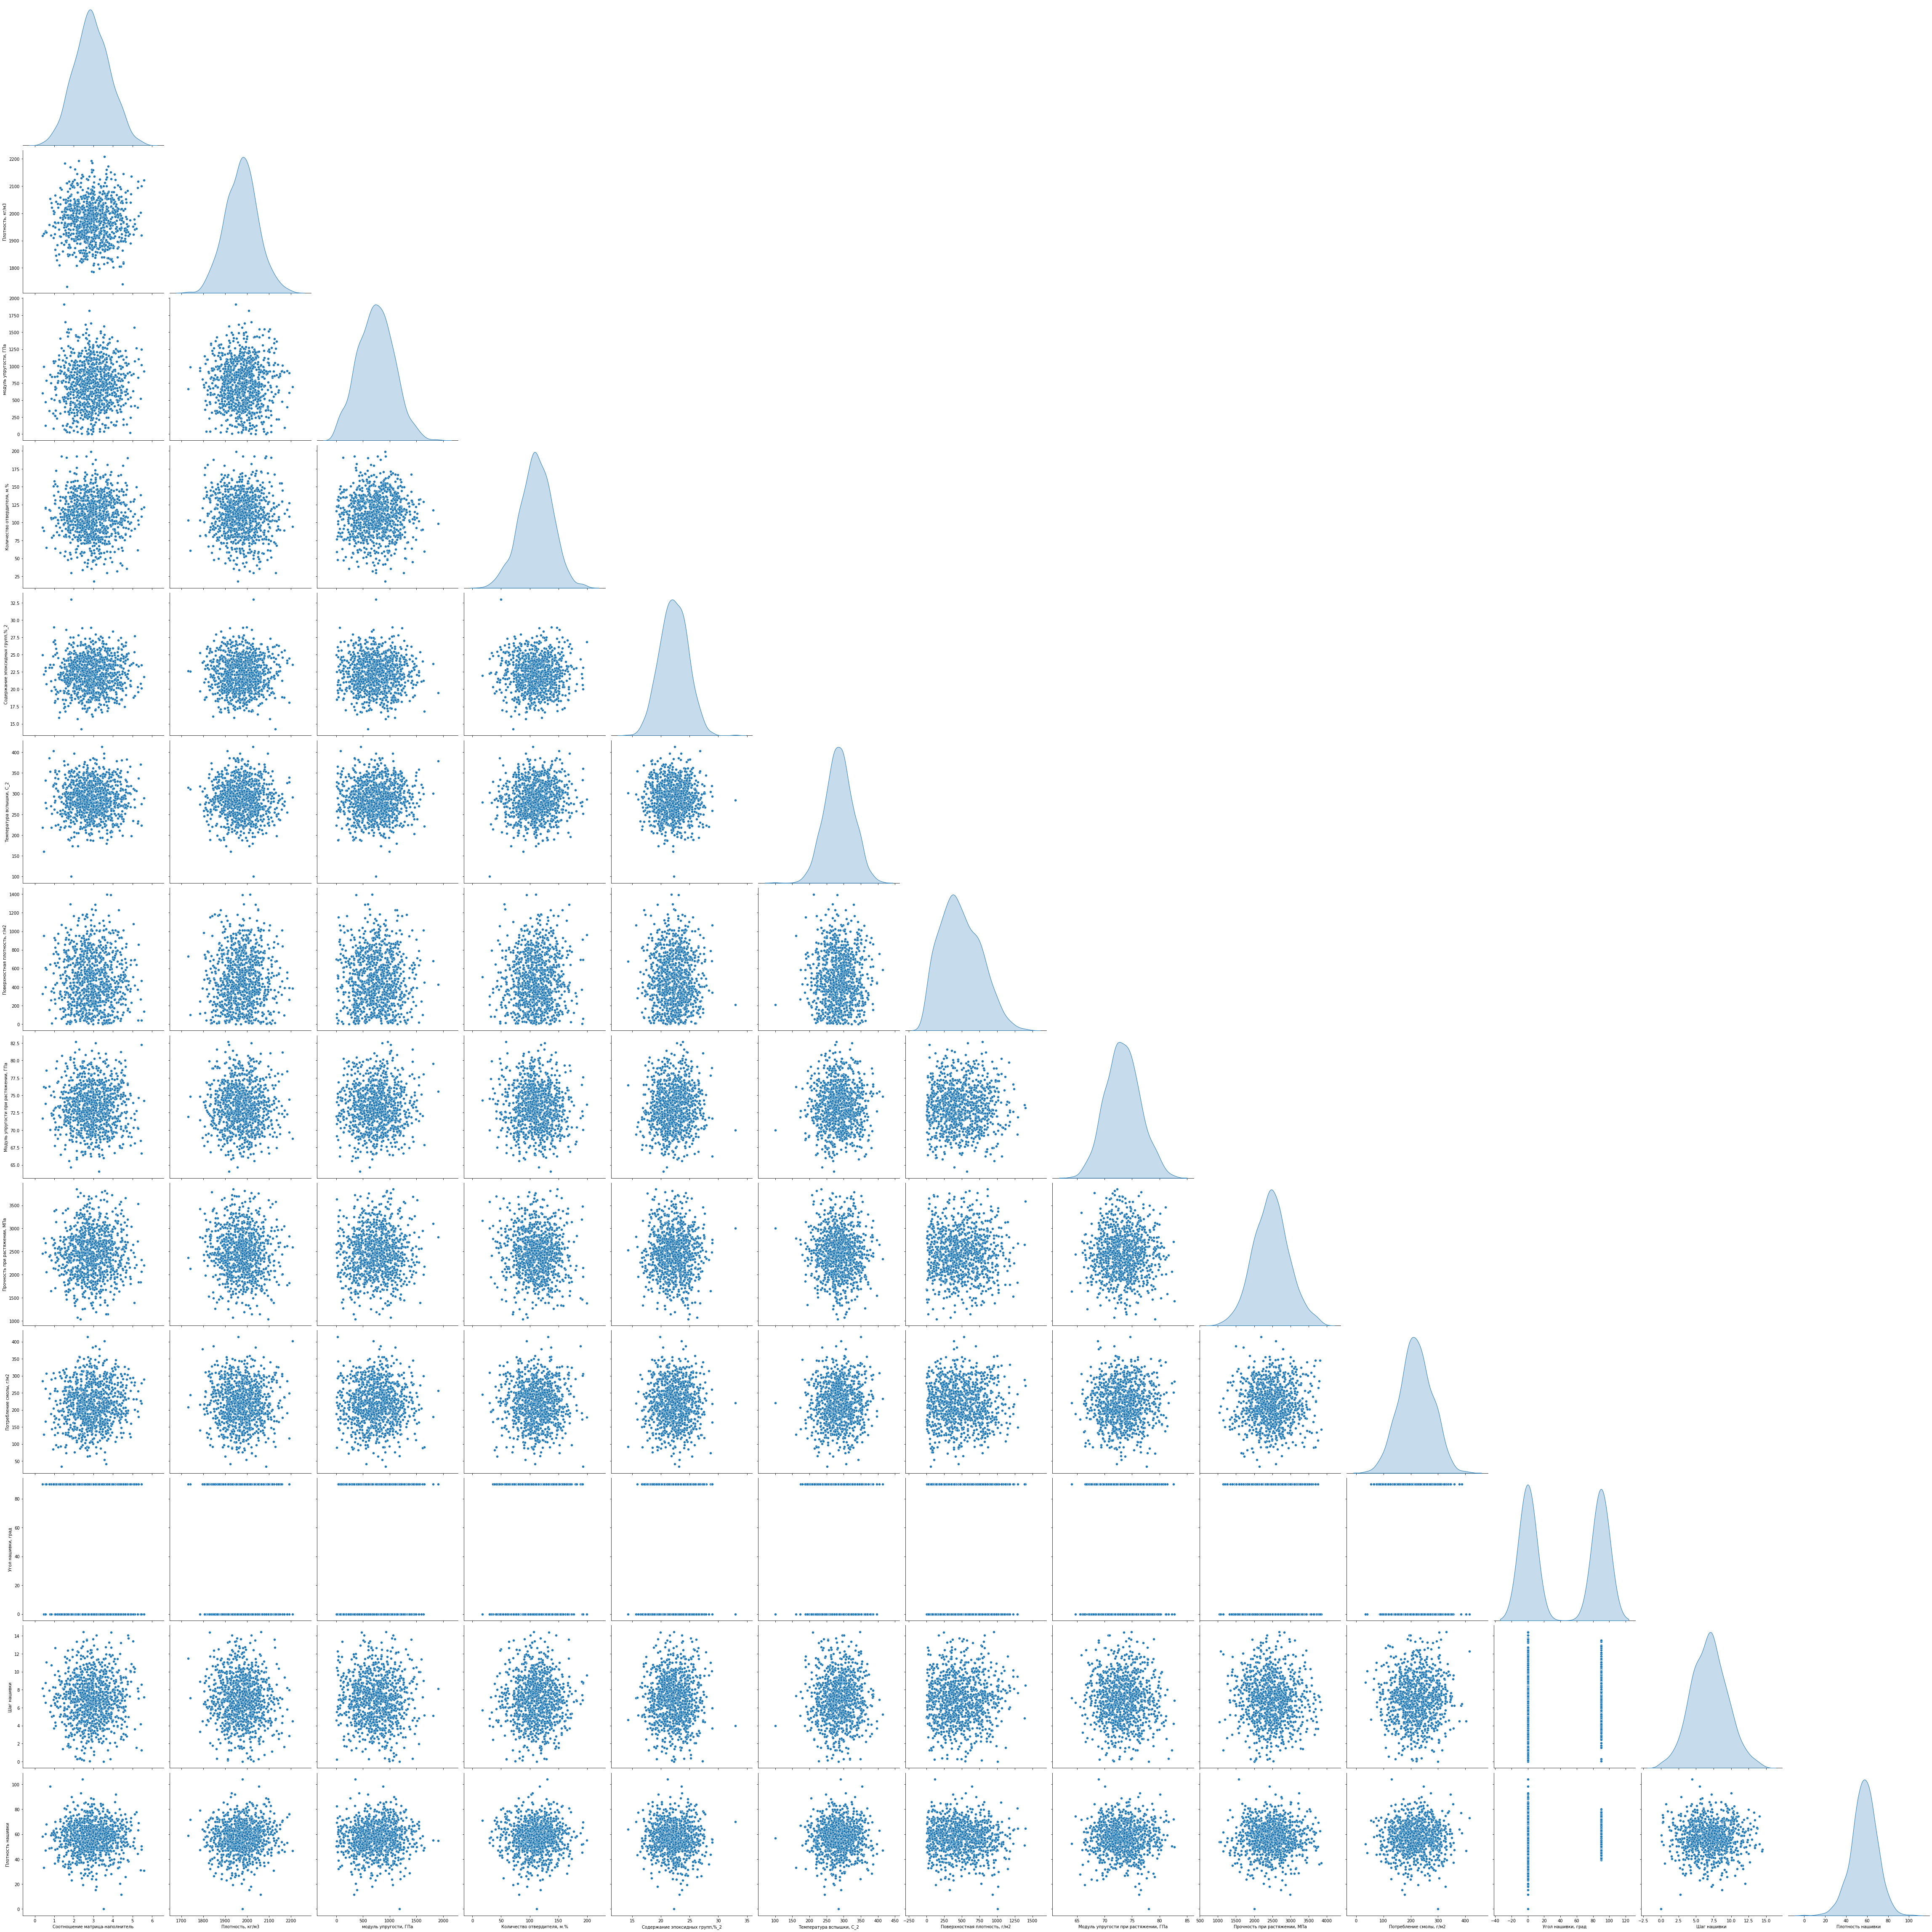

In [8]:
# Строим графики попарного рассеивания.
# Выбросы присутствуют, зависимости не обнаружены. Продолжаем анализ данных.
# 
sns.pairplot(data=ds_full, height=5, diag_kind='kde', corner=True)

<AxesSubplot: >

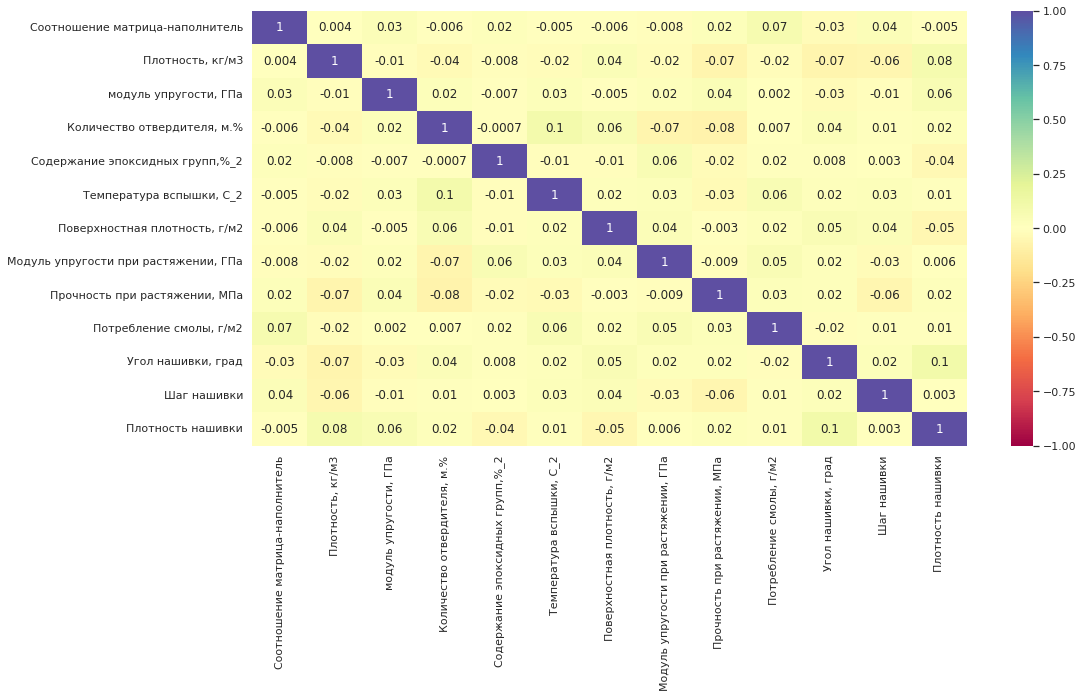

In [9]:
# Строим тепловую карту для визуализации данных.
# Коэффициент корреляции не превышает 0,1 - взаимосвязь параметров незначительная, зацепок не обнаружено
#
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(data=ds_full.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='Spectral')

In [10]:
# На неочищенному датасете закономерностей не было выявлено. Попробуем очистить и поискать заново.
# Удаляем выбросы из датасета.
# Очищенный датасет назовем ds_clean, старый датасет ds_full оставим неизменным.
ds_clean = ds_full.copy()
for column in ds_clean.columns:
    q75, q25 = np.percentile(ds_clean.loc[:,column], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    ds_clean.loc[ds_clean[column] < min, column] = np.nan
    ds_clean.loc[ds_clean[column] > max, column] = np.nan
ds_clean.dropna(inplace = True)
ds_clean.shape

(936, 13)

In [11]:
# Проверяем, все ли выбросы удалены.
sum = 0
for k, column in enumerate(ds_clean.columns):    
    outlier = boxplot_stats(X=ds_clean[column])
    sum+=len(outlier[0]["fliers"])
    print (f'Количество выбросов в столбце "{column}": {len(outlier[0]["fliers"])}')
print(f'Суммарное количество выбросов: {sum}')

Количество выбросов в столбце "Соотношение матрица-наполнитель": 0
Количество выбросов в столбце "Плотность, кг/м3": 0
Количество выбросов в столбце "модуль упругости, ГПа": 1
Количество выбросов в столбце "Количество отвердителя, м.%": 0
Количество выбросов в столбце "Содержание эпоксидных групп,%_2": 0
Количество выбросов в столбце "Температура вспышки, С_2": 0
Количество выбросов в столбце "Поверхностная плотность, г/м2": 0
Количество выбросов в столбце "Модуль упругости при растяжении, ГПа": 1
Количество выбросов в столбце "Прочность при растяжении, МПа": 4
Количество выбросов в столбце "Потребление смолы, г/м2": 1
Количество выбросов в столбце "Угол нашивки, град": 0
Количество выбросов в столбце "Шаг нашивки": 0
Количество выбросов в столбце "Плотность нашивки": 3
Суммарное количество выбросов: 10


In [12]:
# Не все выбросы были удалены, повторяем процедуру удаления.
for column in ds_clean.columns:
    q75, q25 = np.percentile(ds_clean.loc[:,column], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    ds_clean.loc[ds_clean[column] < min, column] = np.nan
    ds_clean.loc[ds_clean[column] > max, column] = np.nan
ds_clean.dropna(inplace = True)
ds_clean.shape

(926, 13)

In [13]:
# Проверяем, все ли выбросы удалены.
sum = 0
for k, column in enumerate(ds_clean.columns):    
    outlier = boxplot_stats(X=ds_clean[column])
    sum+=len(outlier[0]["fliers"])
    print (f'Количество выбросов в столбце "{column}": {len(outlier[0]["fliers"])}')
print(f'Суммарное количество выбросов: {sum}')

Количество выбросов в столбце "Соотношение матрица-наполнитель": 0
Количество выбросов в столбце "Плотность, кг/м3": 0
Количество выбросов в столбце "модуль упругости, ГПа": 0
Количество выбросов в столбце "Количество отвердителя, м.%": 0
Количество выбросов в столбце "Содержание эпоксидных групп,%_2": 0
Количество выбросов в столбце "Температура вспышки, С_2": 0
Количество выбросов в столбце "Поверхностная плотность, г/м2": 0
Количество выбросов в столбце "Модуль упругости при растяжении, ГПа": 0
Количество выбросов в столбце "Прочность при растяжении, МПа": 2
Количество выбросов в столбце "Потребление смолы, г/м2": 1
Количество выбросов в столбце "Угол нашивки, град": 0
Количество выбросов в столбце "Шаг нашивки": 0
Количество выбросов в столбце "Плотность нашивки": 1
Суммарное количество выбросов: 4


In [14]:
# Не все выбросы были удалены, повторяем процедуру удаления.
for column in ds_clean.columns:
    q75, q25 = np.percentile(ds_clean.loc[:,column], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    ds_clean.loc[ds_clean[column] < min, column] = np.nan
    ds_clean.loc[ds_clean[column] > max, column] = np.nan
ds_clean.dropna(inplace = True)
ds_clean.shape

(922, 13)

In [15]:
# Проверяем, все ли выбросы удалены.
# Все выбросы были удалены. Продолжаем работу с датасетом ds_clean.
sum = 0
for k, column in enumerate(ds_clean.columns):    
    outlier = boxplot_stats(X=ds_clean[column])
    sum+=len(outlier[0]["fliers"])
    print (f'Количество выбросов в столбце "{column}": {len(outlier[0]["fliers"])}')
print(f'Суммарное количество выбросов: {sum}')

Количество выбросов в столбце "Соотношение матрица-наполнитель": 0
Количество выбросов в столбце "Плотность, кг/м3": 0
Количество выбросов в столбце "модуль упругости, ГПа": 0
Количество выбросов в столбце "Количество отвердителя, м.%": 0
Количество выбросов в столбце "Содержание эпоксидных групп,%_2": 0
Количество выбросов в столбце "Температура вспышки, С_2": 0
Количество выбросов в столбце "Поверхностная плотность, г/м2": 0
Количество выбросов в столбце "Модуль упругости при растяжении, ГПа": 0
Количество выбросов в столбце "Прочность при растяжении, МПа": 0
Количество выбросов в столбце "Потребление смолы, г/м2": 0
Количество выбросов в столбце "Угол нашивки, град": 0
Количество выбросов в столбце "Шаг нашивки": 0
Количество выбросов в столбце "Плотность нашивки": 0
Суммарное количество выбросов: 0


In [16]:
# Сохраняем датасет ds_clean в файл ds_clean.csv
ds_clean.to_csv('ds_clean.csv')

In [17]:
# Далее попытаемся построить и обучить модели.
# По заданию у нас два целевых показателя - "Модуль упругости при растяжении", "Прочность при растяжении".
# Разбиваем датасет на учебную и контрольную выборки для определения показателя "Прочность при растяжении".
# Результаты будем записывать в список results_strength
x_train_strength, x_test_strength, y_train_strength, y_test_strength = train_test_split(
    ds_clean.drop(['Прочность при растяжении, МПа'], axis=1),
    ds_clean[['Прочность при растяжении, МПа']],
    test_size = 0.3,
    random_state = 42)

results_strength = list()

In [18]:
# Разбиваем датасет на учебную и контрольную выборки для определения показателя "Модуль упругости при растяжении".
# Результаты будем записывать в список results_resilence
x_train_resilence, x_test_resilence, y_train_resilence, y_test_resilence = train_test_split(
    ds_clean.drop(['модуль упругости, ГПа'], axis=1),
    ds_clean[['модуль упругости, ГПа']],
    test_size = 0.3,
    random_state = 42)

results_resilence = list()

In [64]:
# Обучим модель DummyRegressor и проверим точность ее предсказаний по показателям 
# MAPE (средняя абсолютная процентная ошибка), R2 (коэффициент детерминации),
# RMSE (среднеквадратическое отклонение).
# Результаты будем записывать в списки results_strength, results_resilence для последующего анализа.

model_Dummy_strength = DummyRegressor()
model_Dummy_strength.fit(X=x_train_strength, y=y_train_strength.values.ravel())
y_predict_Dummy_strength = model_Dummy_strength.predict(X=x_test_strength)

model_Dummy_resilence = DummyRegressor()
model_Dummy_resilence.fit(X=x_train_resilence, y=y_train_resilence.values.ravel())
y_predict_Dummy_resilence = model_Dummy_resilence.predict(X=x_test_resilence)

mape_Dummy_strength = mean_absolute_percentage_error(y_true=y_test_strength, y_pred=y_predict_Dummy_strength)
mape_Dummy_resilence = mean_absolute_percentage_error(y_true=y_test_resilence, y_pred=y_predict_Dummy_resilence)

r2_Dummy_strength = r2_score(y_true=y_test_strength, y_pred=y_predict_Dummy_strength)
r2_Dummy_resilence = r2_score(y_true=y_test_resilence, y_pred=y_predict_Dummy_resilence)

rmse_Dummy_strength = mean_squared_error(y_true=y_test_strength, y_pred=y_predict_Dummy_strength, squared=False)
rmse_Dummy_resilence = mean_squared_error(y_true=y_test_resilence, y_pred=y_predict_Dummy_resilence, squared=False)

strength= {'results_Dummy_strength': {'mape': mape_Dummy_strength, 'r2': r2_Dummy_strength, 
                                      'rmse': rmse_Dummy_strength}}
results_strength.append(strength)
resilence= {'results_Dummy_resilence': {'mape': mape_Dummy_resilence, 'r2': r2_Dummy_resilence, 
                                        'rmse': rmse_Dummy_resilence}}
results_resilence.append(resilence)

print(f'Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": {mape_Dummy_strength}')
print(f'Коэффициент детерминации для показателя "Прочность при растяжении": {r2_Dummy_strength}')
print(f'Среднеквадратическое отклонение для показателя "Прочность при растяжении": {rmse_Dummy_strength}')
print()
print(f'Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": {mape_Dummy_resilence}')
print(f'Коэффициент детерминации для показателя "Модуль упругости при растяжении": {r2_Dummy_resilence}')
print(f'Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": {rmse_Dummy_resilence}')

Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": 0.1618793702295039
Коэффициент детерминации для показателя "Прочность при растяжении": -5.703200261408803e-05
Среднеквадратическое отклонение для показателя "Прочность при растяжении": 462.66465505686455

Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": 0.9966803273033881
Коэффициент детерминации для показателя "Модуль упругости при растяжении": -0.015710991739769087
Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": 335.3742296551741


In [42]:
# Обучим модель RandomForest (Случайный лес) и проверим точность ее предсказаний по показателям 
# MAPE (средняя абсолютная процентная ошибка), R2 (коэффициент детерминации),
# RMSE (среднеквадратическое отклонение).
# Результаты будем записывать в списки results_strength, results_resilence для последующего анализа.

model_RandomForest_strength = RandomForestRegressor(max_depth=10)
model_RandomForest_strength.fit(X=x_train_strength, y=y_train_strength.values.ravel())
y_predict_RandomForest_strength = model_RandomForest_strength.predict(X=x_test_strength)

model_RandomForest_resilence = RandomForestRegressor(max_depth=10)
model_RandomForest_resilence.fit(X=x_train_resilence, y=y_train_resilence.values.ravel())
y_predict_RandomForest_resilence = model_RandomForest_resilence.predict(X=x_test_resilence)

mape_RandomForest_strength = mean_absolute_percentage_error(y_true=y_test_strength, 
                                                            y_pred=y_predict_RandomForest_strength)
mape_RandomForest_resilence = mean_absolute_percentage_error(y_true=y_test_resilence, 
                                                             y_pred=y_predict_RandomForest_resilence)

r2_RandomForest_strength = r2_score(y_true=y_test_strength, y_pred=y_predict_RandomForest_strength)
r2_RandomForest_resilence = r2_score(y_true=y_test_resilence, y_pred=y_predict_RandomForest_resilence)

rmse_RandomForest_strength = mean_squared_error(y_true=y_test_strength, y_pred=y_predict_RandomForest_strength, 
                                                squared=False)
rmse_RandomForest_resilence = mean_squared_error(y_true=y_test_resilence, y_pred=y_predict_RandomForest_resilence, 
                                                 squared=False)

strength= {'results_RandomForest_strength': {'mape': mape_RandomForest_strength, 'r2': r2_RandomForest_strength, 
                                             'rmse': rmse_RandomForest_strength}}
results_strength.append(strength)
resilence= {'results_RandomForest_resilence': {'mape': mape_RandomForest_resilence, 'r2': r2_RandomForest_resilence, 
                                               'rmse': rmse_RandomForest_resilence}}
results_resilence.append(resilence)

print(f'Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": {mape_RandomForest_strength}')
print(f'Коэффициент детерминации для показателя "Прочность при растяжении": {r2_RandomForest_strength}')
print(f'Среднеквадратическое отклонение для показателя "Прочность при растяжении": {rmse_RandomForest_strength}')
print()
print(f'Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": {mape_RandomForest_resilence}')
print(f'Коэффициент детерминации для показателя "Модуль упругости при растяжении": {r2_RandomForest_resilence}')
print(f'Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": {rmse_RandomForest_resilence}')

Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": 0.16259693284633056
Коэффициент детерминации для показателя "Прочность при растяжении": -0.02053797394765322
Среднеквадратическое отклонение для показателя "Прочность при растяжении": 467.37827766165987

Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": 1.0247620498098275
Коэффициент детерминации для показателя "Модуль упругости при растяжении": -0.09110298975870812
Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": 347.5981728173849


In [43]:
# Обучим модель DecisionTreeRegressor(Деревья решений) и проверим точность ее предсказаний по показателям 
# MAPE (средняя абсолютная процентная ошибка), R2 (коэффициент детерминации),
# RMSE (среднеквадратическое отклонение).
# Результаты будем записывать в списки results_strength, results_resilence для последующего анализа.

model_DecisionTree_strength = DecisionTreeRegressor(max_depth=10)
model_DecisionTree_strength.fit(X=x_train_strength, y=y_train_strength.values.ravel())
y_predict_DecisionTree_strength = model_DecisionTree_strength.predict(X=x_test_strength)

model_DecisionTree_resilence = DecisionTreeRegressor(max_depth=10)
model_DecisionTree_resilence.fit(X=x_train_resilence, y=y_train_resilence.values.ravel())
y_predict_DecisionTree_resilence = model_DecisionTree_resilence.predict(X=x_test_resilence)

mape_DecisionTree_strength = mean_absolute_percentage_error(y_true=y_test_strength, 
                                                            y_pred=y_predict_DecisionTree_strength)
mape_DecisionTree_resilence = mean_absolute_percentage_error(y_true=y_test_resilence, 
                                                             y_pred=y_predict_DecisionTree_resilence)

r2_DecisionTree_strength = r2_score(y_true=y_test_strength, y_pred=y_predict_DecisionTree_strength)
r2_DecisionTree_resilence = r2_score(y_true=y_test_resilence, y_pred=y_predict_DecisionTree_resilence)

rmse_DecisionTree_strength = mean_squared_error(y_true=y_test_strength, y_pred=y_predict_DecisionTree_strength, 
                                                squared=False)
rmse_DecisionTree_resilence = mean_squared_error(y_true=y_test_resilence, y_pred=y_predict_DecisionTree_resilence, 
                                                 squared=False)

strength= {'results_DecisionTree_strength': {'mape': mape_DecisionTree_strength, 'r2': r2_DecisionTree_strength, 
                                             'rmse': rmse_DecisionTree_strength}}
results_strength.append(strength)
resilence= {'results_DecisionTree_resilence': {'mape': mape_DecisionTree_resilence, 'r2': r2_DecisionTree_resilence, 
                                               'rmse': rmse_DecisionTree_resilence}}
results_resilence.append(resilence)

print(f'Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": {mape_DecisionTree_strength}')
print(f'Коэффициент детерминации для показателя "Прочность при растяжении": {r2_DecisionTree_strength}')
print(f'Среднеквадратическое отклонение для показателя "Прочность при растяжении": {rmse_DecisionTree_strength}')
print()
print(f'Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": {mape_DecisionTree_resilence}')
print(f'Коэффициент детерминации для показателя "Модуль упругости при растяжении": {r2_DecisionTree_resilence}')
print(f'Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": {rmse_DecisionTree_resilence}')

Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": 0.18714564786138488
Коэффициент детерминации для показателя "Прочность при растяжении": -0.42119728897408515
Среднеквадратическое отклонение для показателя "Прочность при растяжении": 551.545219034582

Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": 1.0788214322447527
Коэффициент детерминации для показателя "Модуль упругости при растяжении": -0.661346083185719
Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": 428.91839077386834


In [44]:
# Обучим модель AdaBoostRegressor(Адаптивный бустинг) и проверим точность ее предсказаний по показателям 
# MAPE (средняя абсолютная процентная ошибка), R2 (коэффициент детерминации),
# RMSE (среднеквадратическое отклонение).
# Результаты будем записывать в списки results_strength, results_resilence для последующего анализа.

model_AdaBoost_strength = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10))
model_AdaBoost_strength.fit(X=x_train_strength, y=y_train_strength.values.ravel())
y_predict_AdaBoost_strength = model_AdaBoost_strength.predict(X=x_test_strength)

model_AdaBoost_resilence = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10))
model_AdaBoost_resilence.fit(X=x_train_resilence, y=y_train_resilence.values.ravel())
y_predict_AdaBoost_resilence = model_AdaBoost_resilence.predict(X=x_test_resilence)

mape_AdaBoost_strength = mean_absolute_percentage_error(y_true=y_test_strength, y_pred=y_predict_AdaBoost_strength)
mape_AdaBoost_resilence = mean_absolute_percentage_error(y_true=y_test_resilence, 
                                                         y_pred=y_predict_AdaBoost_resilence)

r2_AdaBoost_strength = r2_score(y_true=y_test_strength, y_pred=y_predict_AdaBoost_strength)
r2_AdaBoost_resilence = r2_score(y_true=y_test_resilence, y_pred=y_predict_AdaBoost_resilence)

rmse_AdaBoost_strength = mean_squared_error(y_true=y_test_strength, y_pred=y_predict_AdaBoost_strength, 
                                            squared=False)
rmse_AdaBoost_resilence = mean_squared_error(y_true=y_test_resilence, y_pred=y_predict_AdaBoost_resilence, 
                                             squared=False)

strength= {'results_AdaBoost_strength': {'mape': mape_AdaBoost_strength, 'r2': r2_AdaBoost_strength, 
                                         'rmse': rmse_AdaBoost_strength}}
results_strength.append(strength)
resilence= {'results_AdaBoost_resilence': {'mape': mape_AdaBoost_resilence, 'r2': r2_AdaBoost_resilence, 
                                           'rmse': rmse_AdaBoost_resilence}}
results_resilence.append(resilence)

print(f'Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": {mape_AdaBoost_strength}')
print(f'Коэффициент детерминации для показателя "Прочность при растяжении": {r2_AdaBoost_strength}')
print(f'Среднеквадратическое отклонение для показателя "Прочность при растяжении": {rmse_AdaBoost_strength}')
print()
print(f'Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": {mape_AdaBoost_resilence}')
print(f'Коэффициент детерминации для показателя "Модуль упругости при растяжении": {r2_AdaBoost_resilence}')
print(f'Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": {rmse_AdaBoost_resilence}')

Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": 0.1681450946670627
Коэффициент детерминации для показателя "Прочность при растяжении": -0.09911854034680667
Среднеквадратическое отклонение для показателя "Прочность при растяжении": 485.03849316938346

Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": 1.0730081598030008
Коэффициент детерминации для показателя "Модуль упругости при растяжении": -0.16731488686796547
Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": 359.5328886246631


In [45]:
# Обучим модель KNeighborsRegressor(K ближайших соседей) и проверим точность ее предсказаний по показателям 
# MAPE (средняя абсолютная процентная ошибка), R2 (коэффициент детерминации),
# RMSE (среднеквадратическое отклонение).
# Результаты будем записывать в списки results_strength, results_resilence для последующего анализа.

model_KNeighbors_strength = KNeighborsRegressor(n_neighbors=15)
model_KNeighbors_strength.fit(X=x_train_strength, y=y_train_strength.values.ravel())
y_predict_KNeighbors_strength = model_KNeighbors_strength.predict(X=x_test_strength)

model_KNeighbors_resilence = KNeighborsRegressor(n_neighbors=15)
model_KNeighbors_resilence.fit(X=x_train_resilence, y=y_train_resilence.values.ravel())
y_predict_KNeighbors_resilence = model_KNeighbors_resilence.predict(X=x_test_resilence)

mape_KNeighbors_strength = mean_absolute_percentage_error(y_true=y_test_strength, 
                                                          y_pred=y_predict_KNeighbors_strength)
mape_KNeighbors_resilence = mean_absolute_percentage_error(y_true=y_test_resilence, 
                                                           y_pred=y_predict_KNeighbors_resilence)

r2_KNeighbors_strength = r2_score(y_true=y_test_strength, y_pred=y_predict_KNeighbors_strength)
r2_KNeighbors_resilence = r2_score(y_true=y_test_resilence, y_pred=y_predict_KNeighbors_resilence)

rmse_KNeighbors_strength = mean_squared_error(y_true=y_test_strength, y_pred=y_predict_KNeighbors_strength, 
                                              squared=False)
rmse_KNeighbors_resilence = mean_squared_error(y_true=y_test_resilence, y_pred=y_predict_KNeighbors_resilence, 
                                               squared=False)

strength= {'results_KNeighbors_strength': {'mape': mape_KNeighbors_strength, 'r2': r2_KNeighbors_strength, 
                                           'rmse': rmse_KNeighbors_strength}}
results_strength.append(strength)
resilence= {'results_KNeighbors_resilence': {'mape': mape_KNeighbors_resilence, 'r2': r2_KNeighbors_resilence, 
                                             'rmse': rmse_KNeighbors_resilence}}
results_resilence.append(resilence)

print(f'Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": {mape_KNeighbors_strength}')
print(f'Коэффициент детерминации для показателя "Прочность при растяжении": {r2_KNeighbors_strength}')
print(f'Среднеквадратическое отклонение для показателя "Прочность при растяжении": {rmse_KNeighbors_strength}')
print()
print(f'Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": {mape_KNeighbors_resilence}')
print(f'Коэффициент детерминации для показателя "Модуль упругости при растяжении": {r2_KNeighbors_resilence}')
print(f'Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": {rmse_KNeighbors_resilence}')

Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": 0.16690455662387002
Коэффициент детерминации для показателя "Прочность при растяжении": -0.038686572352361726
Среднеквадратическое отклонение для показателя "Прочность при растяжении": 471.5157432575684

Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": 0.9935207844444374
Коэффициент детерминации для показателя "Модуль упругости при растяжении": -0.040520623548971235
Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": 339.4454238679895


In [46]:
# Обучим модель GradientBoostingRegressor(Градиентный бустинг) и проверим точность ее предсказаний по показателям 
# MAPE (средняя абсолютная процентная ошибка), R2 (коэффициент детерминации),
# RMSE (среднеквадратическое отклонение).
# Результаты будем записывать в списки results_strength, results_resilence для последующего анализа.

model_GradientBoosting_strength = GradientBoostingRegressor()
model_GradientBoosting_strength.fit(X=x_train_strength, y=y_train_strength.values.ravel())
y_predict_GradientBoosting_strength = model_GradientBoosting_strength.predict(X=x_test_strength)

model_GradientBoosting_resilence = GradientBoostingRegressor()
model_GradientBoosting_resilence.fit(X=x_train_resilence, y=y_train_resilence.values.ravel())
y_predict_GradientBoosting_resilence = model_GradientBoosting_resilence.predict(X=x_test_resilence)

mape_GradientBoosting_strength = mean_absolute_percentage_error(y_true=y_test_strength, 
                                                                y_pred=y_predict_GradientBoosting_strength)
mape_GradientBoosting_resilence = mean_absolute_percentage_error(y_true=y_test_resilence, 
                                                                 y_pred=y_predict_GradientBoosting_resilence)

r2_GradientBoosting_strength = r2_score(y_true=y_test_strength, y_pred=y_predict_GradientBoosting_strength)
r2_GradientBoosting_resilence = r2_score(y_true=y_test_resilence, y_pred=y_predict_GradientBoosting_resilence)

rmse_GradientBoosting_strength = mean_squared_error(y_true=y_test_strength, 
                                                    y_pred=y_predict_GradientBoosting_strength, squared=False)
rmse_GradientBoosting_resilence = mean_squared_error(y_true=y_test_resilence, 
                                                     y_pred=y_predict_GradientBoosting_resilence, squared=False)

strength= {'results_GradientBoosting_strength': {'mape': mape_GradientBoosting_strength, 
                                     'r2': r2_GradientBoosting_strength, 'rmse': rmse_GradientBoosting_strength}}
results_strength.append(strength)
resilence= {'results_GradientBoosting_resilence': {'mape': mape_GradientBoosting_resilence, 
                                    'r2': r2_GradientBoosting_resilence, 'rmse': rmse_GradientBoosting_resilence}}
results_resilence.append(resilence)

print(f'Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": {mape_GradientBoosting_strength}')
print(f'Коэффициент детерминации для показателя "Прочность при растяжении": {r2_GradientBoosting_strength}')
print(f'Среднеквадратическое отклонение для показателя "Прочность при растяжении": {rmse_GradientBoosting_strength}')
print()
print(f'Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": {mape_GradientBoosting_resilence}')
print(f'Коэффициент детерминации для показателя "Модуль упругости при растяжении": {r2_GradientBoosting_resilence}')
print(f'Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": {rmse_GradientBoosting_resilence}')

Средняя абсолютная процентная ошибка для показателя "Прочность при растяжении": 0.16675182701138108
Коэффициент детерминации для показателя "Прочность при растяжении": -0.04941267158121132
Среднеквадратическое отклонение для показателя "Прочность при растяжении": 473.94406716764917

Средняя абсолютная процентная ошибка для показателя "Модуль упругости при растяжении": 1.0325181371857117
Коэффициент детерминации для показателя "Модуль упругости при растяжении": -0.12481246909572552
Среднеквадратическое отклонение для показателя "Модуль упругости при растяжении": 352.9268281380933


In [47]:
# Сравниваем результаты работы моделей для показателя "Прочность при растяжении"
# по показателям MAPE (средняя абсолютная процентная ошибка),
# R2 (коэффициент детерминации), RMSE (среднеквадратическое отклонение).
# Видим, что модель DecisionTree отработала хуже других, а модель Dummy немного лучше других.
# В целом - анализ показывает, что говорит ни одна модель не дает достаточной точности предсказания.
# Это может говорить о недостаточности или некорректности данных в исходном датасете.
#

for i in results_strength:
    for k1,v1 in i.items():
        print(k1[8:])
        for k2,v2 in v1.items():
            print(f'{k2} = {v2}')
    print()

Dummy_strength
mape = 0.1618793702295039
r2 = -5.703200261408803e-05
rmse = 462.66465505686455

RandomForest_strength
mape = 0.16259693284633056
r2 = -0.02053797394765322
rmse = 467.37827766165987

DecisionTree_strength
mape = 0.18714564786138488
r2 = -0.42119728897408515
rmse = 551.545219034582

AdaBoost_strength
mape = 0.1681450946670627
r2 = -0.09911854034680667
rmse = 485.03849316938346

KNeighbors_strength
mape = 0.16690455662387002
r2 = -0.038686572352361726
rmse = 471.5157432575684

GradientBoosting_strength
mape = 0.16675182701138108
r2 = -0.04941267158121132
rmse = 473.94406716764917



In [48]:
# Сравниваем результаты работы моделей для показателя "Модуль упругости при растяжении"
# по показателям MAPE (средняя абсолютная процентная ошибка),
# R2 (коэффициент детерминации), RMSE (среднеквадратическое отклонение).
# Видим, что модель DecisionTree отработала хуже других, а модель Dummy немного лучше других.
# В целом - анализ показывает, что говорит ни одна модель не дает достаточной точности предсказания.
# Это может говорить о недостаточности или некорректности данных в исходном датасете.
#

for i in results_resilence:
    for k1,v1 in i.items():
        print(k1[8:])
        for k2,v2 in v1.items():
            print(f'{k2} = {v2}')
    print()

Dummy_resilence
mape = 0.9966803273033881
r2 = -0.015710991739769087
rmse = 335.3742296551741

RandomForest_resilence
mape = 1.0247620498098275
r2 = -0.09110298975870812
rmse = 347.5981728173849

DecisionTree_resilence
mape = 1.0788214322447527
r2 = -0.661346083185719
rmse = 428.91839077386834

AdaBoost_resilence
mape = 1.0730081598030008
r2 = -0.16731488686796547
rmse = 359.5328886246631

KNeighbors_resilence
mape = 0.9935207844444374
r2 = -0.040520623548971235
rmse = 339.4454238679895

GradientBoosting_resilence
mape = 1.0325181371857117
r2 = -0.12481246909572552
rmse = 352.9268281380933



In [20]:
# Далее построим нейронную сеть.
# По заданию наш целевой показатель - "Соотношение матрица-наполнитель".
# Разбиваем датасет на учебную и контрольную выборки для определения показателя "Соотношение матрица-наполнитель".
# Результаты будем записывать в список results_filler

x_train_filler, x_test_filler, y_train_filler, y_test_filler = train_test_split(
    ds_clean.drop(['Соотношение матрица-наполнитель'], axis=1),
    ds_clean[['Соотношение матрица-наполнитель']],
       test_size = 0.3,
    random_state = 42)

results_filler = list()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


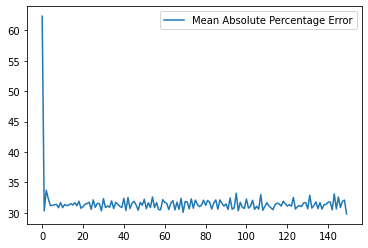

9/9 [==============================] - 0s 2ms/step
Mean Absolute Percentage Error = 0.3068224647241177


In [53]:
# Построим нейронную сеть, состоящую из трех слоев.
# В первом и втором слоях будет по 8 нейронов, в третьем слое 1 нейрон.
# Проверку точности будем осуществлять по показателю MAPE (средняя абсолютная процентная ошибка).
#

model_filler_1 = keras.Sequential()
model_filler_1.add(Dense(8, input_shape = (12,), activation = 'sigmoid'))
model_filler_1.add(Dense(8, activation = 'sigmoid'))
model_filler_1.add(Dense(1, activation = 'relu'))
model_filler_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mse', 
                metrics=tf.keras.metrics.MeanAbsolutePercentageError())
model_filler_1.summary()
history = model_filler_1.fit(x_train_filler,y_train_filler, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=False)
plt.plot(history.history['mean_absolute_percentage_error'], label = 'Mean Absolute Percentage Error')
plt.xlabel = ('epochs')
plt.ylabel = ('mean_absolute_percentage_error')
plt.legend()
plt.show()
mape_filler_1 = mean_absolute_percentage_error(y_true=y_test_filler, y_pred=model_filler_1.predict(x_test_filler))
print(f'Mean Absolute Percentage Error = {mape_filler_1}')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


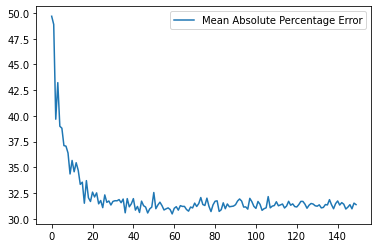

9/9 [==============================] - 0s 2ms/step
Mean Absolute Percentage Error = 0.30133786577924193


In [54]:
# Попробуем улучшить результат, полученный нашей нейронной сетью, состоящей из трех слоев (8,8,1).
# Добавим метод борьбы с переобучением DropOut и проверим результат.
# Проверку точности будем осуществлять по показателю MAPE (средняя абсолютная процентная ошибка).

model_filler_1_d = keras.Sequential()
model_filler_1_d.add(Dense(8, input_shape = (12,), activation = 'sigmoid'))
model_filler_1_d.add(Dropout(0.5))
model_filler_1_d.add(Dense(8, activation = 'sigmoid'))
model_filler_1_d.add(Dropout(0.5))
model_filler_1_d.add(Dense(1, activation = 'relu'))
model_filler_1_d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mse', 
                  metrics=tf.keras.metrics.MeanAbsolutePercentageError())
model_filler_1_d.summary()
history = model_filler_1_d.fit(x_train_filler,y_train_filler, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=False)
plt.plot(history.history['mean_absolute_percentage_error'], label = 'Mean Absolute Percentage Error')
plt.xlabel = ('epochs')
plt.ylabel = ('mean_absolute_percentage_error')
plt.legend()
plt.show()
mape_filler_1_d = mean_absolute_percentage_error(y_true=y_test_filler, y_pred=model_filler_1_d.predict(x_test_filler))
print(f'Mean Absolute Percentage Error = {mape_filler_1_d}')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1664      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


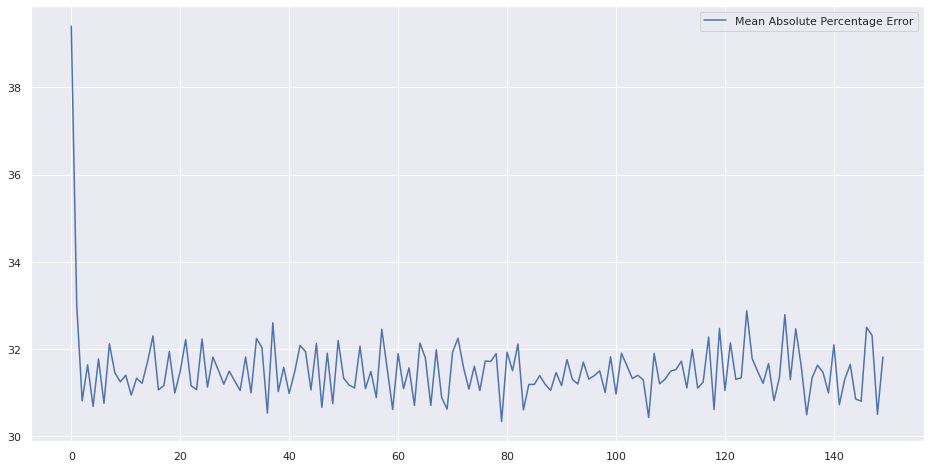

9/9 [==============================] - 0s 2ms/step
Mean Absolute Percentage Error = 0.2954305880890412


In [21]:
# Построим нейронную сеть, состоящую из пяти слоев.
# В первом слое 128 нейронов, во втором 64, в третьем 32, в четвертом 16, в пятом 1 нейрон.
# Проверку точности будем осуществлять по показателю MAPE (средняя абсолютная процентная ошибка).
#
model_filler_2 = keras.Sequential()
model_filler_2.add(Dense(128,  input_shape = (12,), activation = 'sigmoid'))
model_filler_2.add(Dense(64, activation = 'sigmoid'))
model_filler_2.add(Dense(32, activation = 'sigmoid'))
model_filler_2.add(Dense(16, activation = 'sigmoid'))
model_filler_2.add(Dense(1, activation = 'relu'))
model_filler_2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mse', 
                metrics=tf.keras.metrics.MeanAbsolutePercentageError())
model_filler_2.summary()
history = model_filler_2.fit(x_train_filler,y_train_filler, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=False)
plt.plot(history.history['mean_absolute_percentage_error'], label = 'Mean Absolute Percentage Error')
plt.xlabel = ('epochs')
plt.ylabel = ('mean_absolute_percentage_error')
plt.legend()
plt.show()
mape_filler_2 = mean_absolute_percentage_error(y_true=y_test_filler, y_pred=model_filler_2.predict(x_test_filler))
print(f'Mean Absolute Percentage Error = {mape_filler_2}')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               1664      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)               

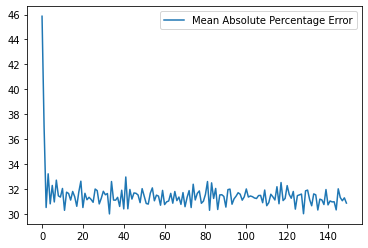

9/9 [==============================] - 0s 2ms/step
Mean Absolute Percentage Error = 0.3043308200706964


In [58]:
# Попробуем улучшить результат, полученный нашей нейронной сетью, состоящей из пяти слоев (128,64,32,16,1).
# Добавим метод борьбы с переобучением DropOut и проверим результат.
# Проверку точности будем осуществлять по показателю MAPE (средняя абсолютная процентная ошибка).

model_filler_2_d = keras.Sequential()
model_filler_2_d.add(Dense(128,  input_shape = (12,), activation = 'sigmoid'))
model_filler_2_d.add(Dropout(0.5))
model_filler_2_d.add(Dense(64, activation = 'sigmoid'))
model_filler_2_d.add(Dropout(0.5))
model_filler_2_d.add(Dense(32, activation = 'sigmoid'))
model_filler_2_d.add(Dropout(0.5))
model_filler_2_d.add(Dense(16, activation = 'sigmoid'))
model_filler_2_d.add(Dense(1, activation = 'relu'))
model_filler_2_d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mse', 
                  metrics=tf.keras.metrics.MeanAbsolutePercentageError())
model_filler_2_d.summary()
history = model_filler_2_d.fit(x_train_filler,y_train_filler, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=False)
plt.plot(history.history['mean_absolute_percentage_error'], label = 'Mean Absolute Percentage Error')
plt.xlabel = ('epochs')
plt.ylabel = ('mean_absolute_percentage_error')
plt.legend()
plt.show()
mape_filler_2_d = mean_absolute_percentage_error(y_true=y_test_filler, y_pred=model_filler_2_d.predict(x_test_filler))
print(f'Mean Absolute Percentage Error = {mape_filler_2_d}')

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_213 (Dense)           (None, 128)               1664      
                                                                 
 batch_normalization_50 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_214 (Dense)           (None, 64)                8256      
                                                                 
 batch_normalization_51 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_215 (Dense)           (None, 32)                2080      
                                                                 
 dense_216 (Dense)           (None, 16)              

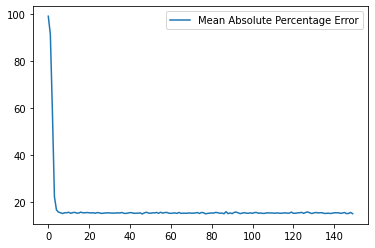

9/9 [==============================] - 0s 2ms/step
Mean Absolute Percentage Error = 0.16615073962883023


In [130]:
# Построим нейронную сеть для прогнозирования показателя "Прочность при растяжении".
# Нейронная сеть будет состоять из пяти слоев (128,64,32,16,1).
# Для улучшения результата применим пакетную нормализацию (BatchNormalization).
# Проверку точности будем осуществлять по показателю MAPE (средняя абсолютная процентная ошибка).
#

model_strength = keras.Sequential()
model_strength.add(Dense(128,  input_shape = (12,), activation = 'selu'))
model_strength.add(BatchNormalization())
model_strength.add(Dense(64, activation = 'selu'))
model_strength.add(BatchNormalization())
model_strength.add(Dense(32, activation = 'selu'))
model_strength.add(Dense(16, activation = 'selu'))
model_strength.add(Dense(1, activation = 'relu'))
model_strength.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mse', 
                metrics=tf.keras.metrics.MeanAbsolutePercentageError())
model_strength.summary()
history = model_strength.fit(x_train_strength,y_train_strength, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=False)
plt.plot(history.history['mean_absolute_percentage_error'], label = 'Mean Absolute Percentage Error')
plt.xlabel = ('epochs')
plt.ylabel = ('mean_absolute_percentage_error')
plt.legend()
plt.show()
mape_model_strength = mean_absolute_percentage_error(y_true=y_test_strength, y_pred=model_strength.predict(x_test_strength))
print(f'Mean Absolute Percentage Error = {mape_model_strength}')

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_203 (Dense)           (None, 128)               1664      
                                                                 
 batch_normalization_44 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_204 (Dense)           (None, 64)                8256      
                                                                 
 batch_normalization_45 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_23 (Dropout)        (None, 64)              

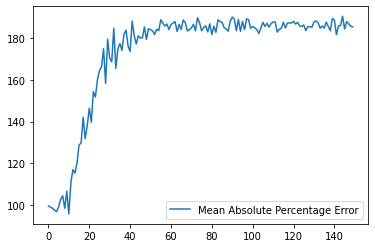

9/9 [==============================] - 0s 2ms/step
Mean Absolute Percentage Error = 0.9952317438829639


In [103]:
# Построим нейронную сеть для прогнозирования показателя "Модуль упругости при растяжении".
# Нейронная сеть будет состоять из пяти слоев (128,64,32,16,1).
# Для улучшения результата применим пакетную нормализацию (BatchNormalization) и DropOut.
# Проверку точности будем осуществлять по показателю MAPE (средняя абсолютная процентная ошибка).
#

model_resilence = keras.Sequential()
model_resilence.add(Dense(128,  input_shape = (12,), activation = 'relu'))
model_resilence.add(BatchNormalization())
model_resilence.add(Dropout(0.5))
model_resilence.add(Dense(64, activation = 'relu'))
model_resilence.add(BatchNormalization())
model_resilence.add(Dropout(0.5))
model_resilence.add(Dense(32, activation = 'relu'))
model_resilence.add(BatchNormalization())
model_resilence.add(Dropout(0.5))
model_resilence.add(Dense(16, activation = 'relu'))
model_resilence.add(BatchNormalization())
model_resilence.add(Dense(1, activation = 'relu'))
model_resilence.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mse', 
                metrics=tf.keras.metrics.MeanAbsolutePercentageError())
model_resilence.summary()
history = model_resilence.fit(x_train_resilence,y_train_resilence, 
                    epochs=150, 
                    validation_split=0.1, 
                    verbose=False)
plt.plot(history.history['mean_absolute_percentage_error'], label = 'Mean Absolute Percentage Error')
plt.xlabel = ('epochs')
plt.ylabel = ('mean_absolute_percentage_error')
plt.legend()
plt.show()
mape_model_resilence = mean_absolute_percentage_error(y_true=y_test_resilence, y_pred=model_resilence.predict(x_test_resilence))
print(f'Mean Absolute Percentage Error = {mape_model_resilence}')

In [106]:
# Сохраним модели model_strength, model_resilence и model_filler_2 для дальнейшей работы.

model_strength.save('model_strength')
model_resilence.save('model_resilence')
model_filler_2.save('model_filler')